# IR Approx
This notebook prototypes the construction of IIR filter kernels to approximate FIR impulse responses using machine learning

In [1]:
# imports 
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy.signal import freqz
import numpy as np
from IPython.display import Audio
from main import Trainer

## Step 1: Procure an impulse response from [ToneHunt.org](https://tonehunt.org/)

--2025-03-01 09:00:39--  https://aekspllirhgukfwncmhb.supabase.co/storage/v1/object/public/models/0.7209741631584776.zip
Resolving aekspllirhgukfwncmhb.supabase.co (aekspllirhgukfwncmhb.supabase.co)... 172.64.149.246, 104.18.38.10
Connecting to aekspllirhgukfwncmhb.supabase.co (aekspllirhgukfwncmhb.supabase.co)|172.64.149.246|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34291 (33K) [application/octet-stream]
Saving to: ‘0.7209741631584776.zip’

0.7209741631584776. 100%[===================>]  33.49K  --.-KB/s    in 0.004s  

2025-03-01 09:00:40 (7.29 MB/s) - ‘0.7209741631584776.zip’ saved [34291/34291]

Archive:  0.7209741631584776.zip
  inflating: Mesa_OS_4x12_57_m160.wav  


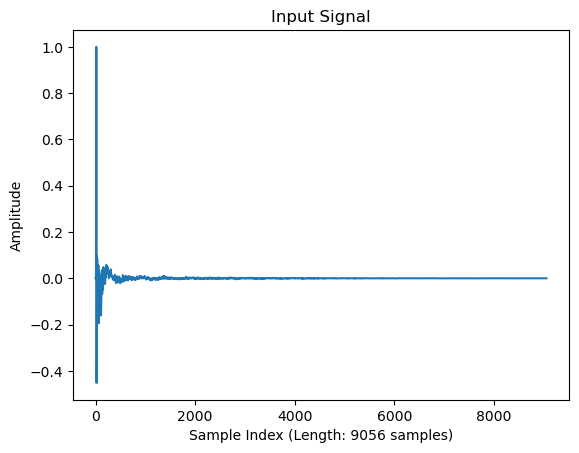

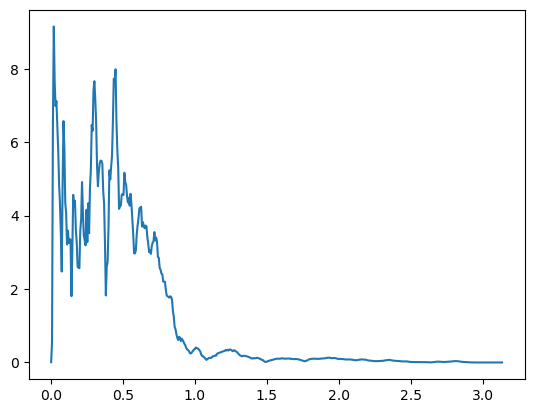

In [2]:
# Get file and load into notebook (TODO: Make Interactive)
!wget https://aekspllirhgukfwncmhb.supabase.co/storage/v1/object/public/models/0.7209741631584776.zip
!unzip 0.7209741631584776.zip
!rm 0.7209741631584776.zip
!mv Mesa_OS_4x12_57_m160.wav input.wav
input_rate, input_signal = wavfile.read('input.wav')

# Display and sonify the IR
plt.plot(input_signal)
plt.xlabel('Sample Index' + ' (Length: ' + str(len(input_signal)) + ' samples)')
plt.ylabel('Amplitude')
plt.title('Input Signal')
plt.show()
w, h = freqz(b=input_signal)
plt.plot(w, abs(h))
Audio(data = input_signal, rate = input_rate)

## Step 2: Pass Audio to Trainer

Final error: 0.28950203510356337
Training time: 33.87 seconds


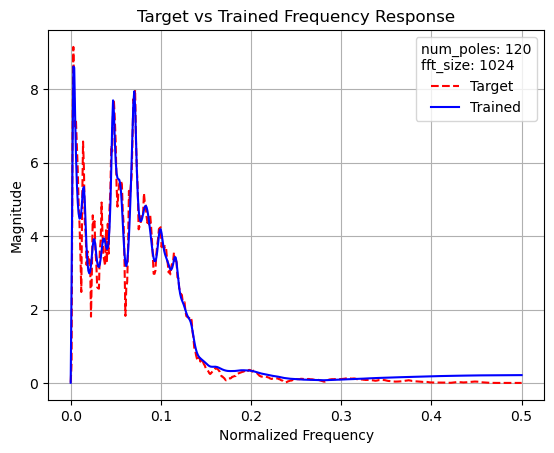

Feedforward Coefficients (ff_coefs):
[ 4.15439512e-01  1.02685440e-01  3.22469360e-01  3.85252199e-02
  2.75234046e-02 -1.15539133e-02 -4.08387112e-02 -4.94616300e-02
 -3.07923750e-02  5.03979759e-04  2.01089399e-02  1.86053258e-02
 -1.47082550e-03 -1.98188528e-02 -2.27288260e-02 -1.84034506e-02
 -1.35656533e-02 -1.64293539e-02 -1.81178408e-02 -1.76812820e-02
 -1.65404692e-02 -1.85503001e-02 -1.87620739e-02 -1.54860014e-02
 -1.06984989e-02 -6.83874109e-03 -6.13490222e-03 -1.09940706e-02
 -1.80457470e-02 -2.23253180e-02 -2.23840906e-02 -1.93090696e-02
 -1.71167795e-02 -1.63439697e-02 -1.45462322e-02 -1.13731179e-02
 -7.42246850e-03 -3.99003645e-03 -3.03591080e-03 -4.85608802e-03
 -8.20288764e-03 -1.29906823e-02 -1.71535920e-02 -1.98870750e-02
 -2.06767195e-02 -2.07918988e-02 -2.06802005e-02 -1.94654505e-02
 -1.69569175e-02 -1.52419316e-02 -1.47227221e-02 -1.45279043e-02
 -1.43959832e-02 -1.36383182e-02 -1.16571790e-02 -9.24086441e-03
 -7.19074470e-03 -6.16633753e-03 -5.44343297e-03 -4.9

In [3]:
size = 1028

# train
trainer = Trainer(max_poles=120)
trainer(input_signal)

# evaluate
test_signal = np.zeros(size)
test_signal[0] = 1
test_signal = trainer.apply_filter(test_signal)
Audio(data = test_signal, rate = 48000)

## Step 3: Output C++ Header Containing the filter object